In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger
# A basic example how to use the package

In [2]:
# imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
import pickle
sys.path.append("../")
from pone_dm import PDM, config, dm2nu, atm_shower 
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$',r'$\nu_{e}$',r'$\nu_{\tau}$']

In [4]:
# Some example settings
config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)
#config['atmospheric showers']['particles of interest']=['nue']

In [5]:
p=atm_shower.Atm_Shower()

ayay


In [6]:
pdm = PDM()

ayay


In [7]:
# Grids
mass_grid = np.logspace(3, 6, 31)
sv_grid = np.logspace(-26, -22, 100)
# The limit calculation
pdm.limit_calc(mass_grid=mass_grid, sv_grid=sv_grid[::-1])

  0%|          | 0/100 [00:00<?, ?it/s]/home/kruteesh/Desktop/DM_nu_simulation_P-One/pone_master/pone_dm/notebooks/../pone_dm/dm2nu.py:336: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/pone_master/pone_dm/notebooks/../pone_dm/dm2nu.py:337: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
100%|██████████| 100/100 [02:11<00:00,  1.31s/it]


In [20]:
# Plotting standards
std_size = 15.  # Size of the plot
fontsize = 25.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [9]:
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")

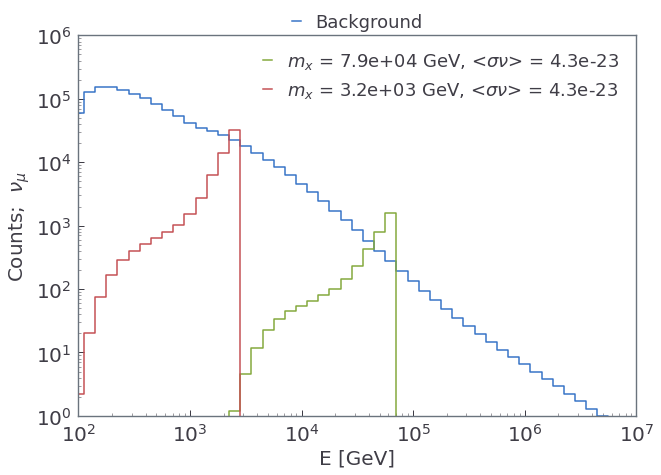

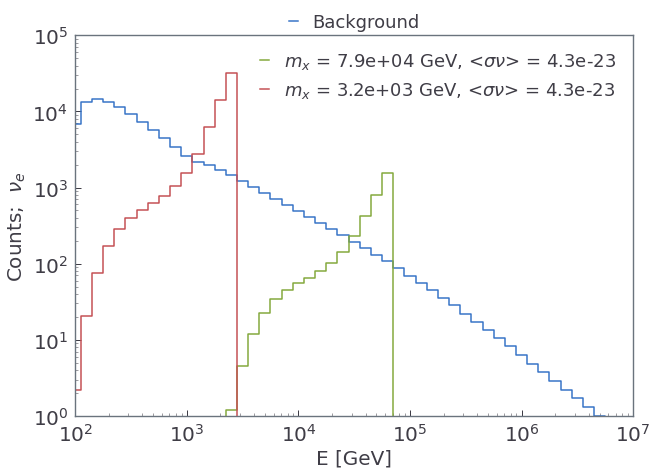

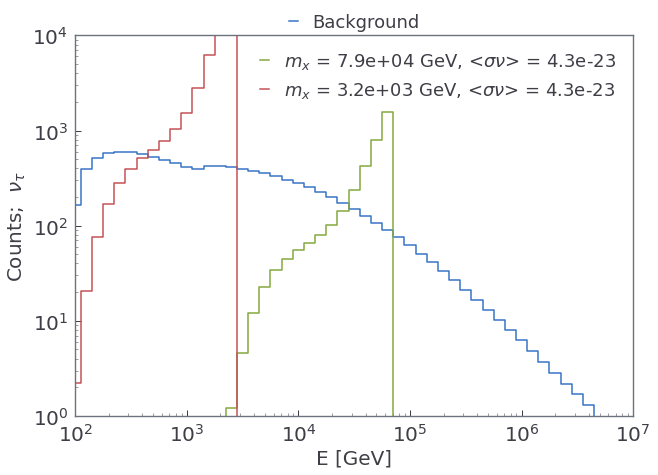

In [10]:
# plotting the Counts----
for j,i in enumerate(config['atmospheric showers']['particles of interest']):
    # Particle counts
    # ---------------------------------------------
    # Setup
    figure, ax1 = plt.subplots(1, 1, figsize=(10,7), sharey=True)
    # ---------------------------------------------
    # Plotting
    ax1.step(pdm._shower_sim.egrid,
             pdm._limit_calc._bkgrd[i],
             label='Background')
    mass_id = -12
    sv_id = -10
    ax1.step(pdm._shower_sim.egrid,
             pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]],
             label=r'$m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
    # The correspondin CL value
    x = (
        (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
        pdm._limit_calc._bkgrd[i][pdm._limit_calc._t_d:]
    )
   
    mass_id = 5
    sv_id = -10
    ax1.step(pdm._shower_sim.egrid,
             pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]],
             label=r'$m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
    # Corresponding CL value
    x = (
        (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
        pdm._limit_calc._bkgrd[i][pdm._limit_calc._t_d:]
    )
   
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel(r"E [GeV]", fontsize=fontsize)
    ax1.set_ylabel("Counts;  " + name[j], fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    
    if j==0:
        ax1.set_ylim(1e0, 1e6)
        ax1.set_xlim(1e2, 1e7)
    elif j==1:
        ax1.set_ylim(1e0, 1e5)
        ax1.set_xlim(1e2, 1e7)
    elif j==2:
        ax1.set_ylim(1e0, 1e4)
        ax1.set_xlim(1e2, 1e7)
        
    # ---------------------------------------------
    # Legend
    h, l = ax1.get_legend_handles_labels()
    
    lgd1 = ax1.legend([h[0]], [l[0]], loc=9, bbox_to_anchor=(0.5, +1.1),
                      ncol=2, fontsize=fontsize-2, handlelength=h_length,
                      fancybox=True, frameon=False)
    lgd2 = ax1.legend(h[1:], l[1:], loc=9, bbox_to_anchor=(0.65, +1.0),
                      ncol=1, fontsize=fontsize-2, handlelength=h_length,
                      fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Flux_Example_"+i+".png",
                   bbox_inches='tight', dpi=export_dpi)

In [11]:
test_chi2 = {}
for i in config["pone"]["specific particle scaling"].keys():
    test_chi2[i] = np.array([[
        (pdm._limit_calc._signal_counts[mass_grid[mass_id]][sv_grid[sv_id]]**2.)[pdm._limit_calc._t_d:] /
        pdm._limit_calc._bkgrd[i][pdm._limit_calc._t_d:] for mass_id in range(0, len(mass_grid))
    ] for sv_id in range(0, len(sv_grid))])

In [12]:
CL_test = {}
for i in config["pone"]["specific particle scaling"].keys():
    CL_test[i] = np.array([[
        1. - chi2.sf(np.sum(np.nan_to_num(SoB)), 2) for SoB in line
    ] for line in test_chi2[i]])

In [13]:
# Loading comparison data
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

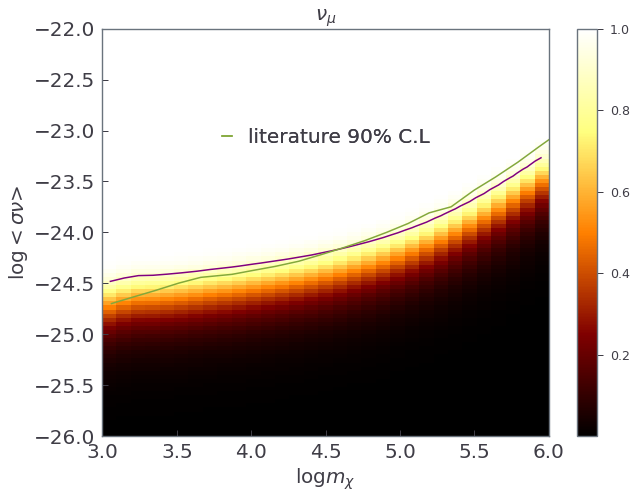

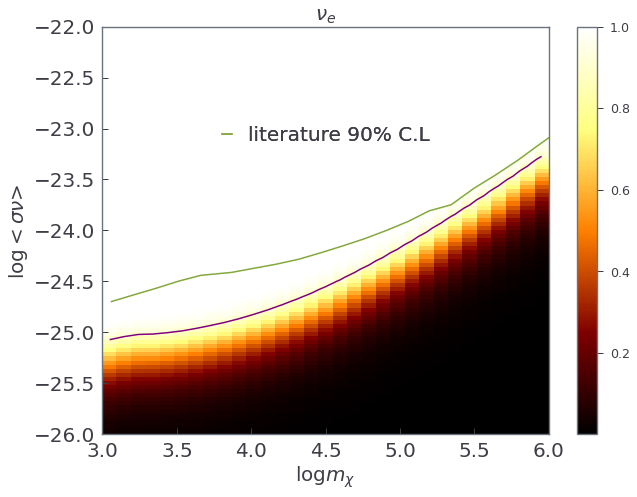

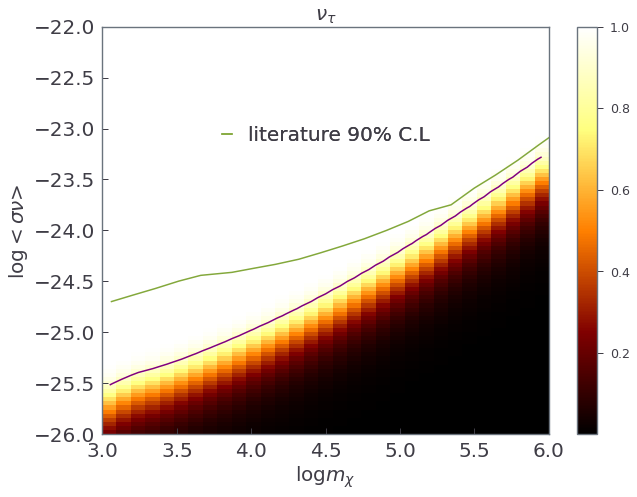

In [14]:
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
    # ---------------------------------------------
    # Plotting
    plt.title(name[j],fontsize=fontsize)
    ax1.contour(1 - pdm.results[i], levels = [0.9], colors='purple',
                origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    pos = ax1.imshow(1 - pdm.results[i], extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='upper', aspect='auto',cmap=plt.cm.afmhot)
    figure.colorbar(pos, ax=ax1)
    ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log m_{\chi}$", fontsize=fontsize)
    ax1.set_ylabel(r"$\log<\sigma \nu$>", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), max(np.log10(sv_grid)))
    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +0.8),
                     ncol=2, fontsize=fontsize, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_"+i+".png",
                   bbox_inches='tight', dpi=export_dpi)

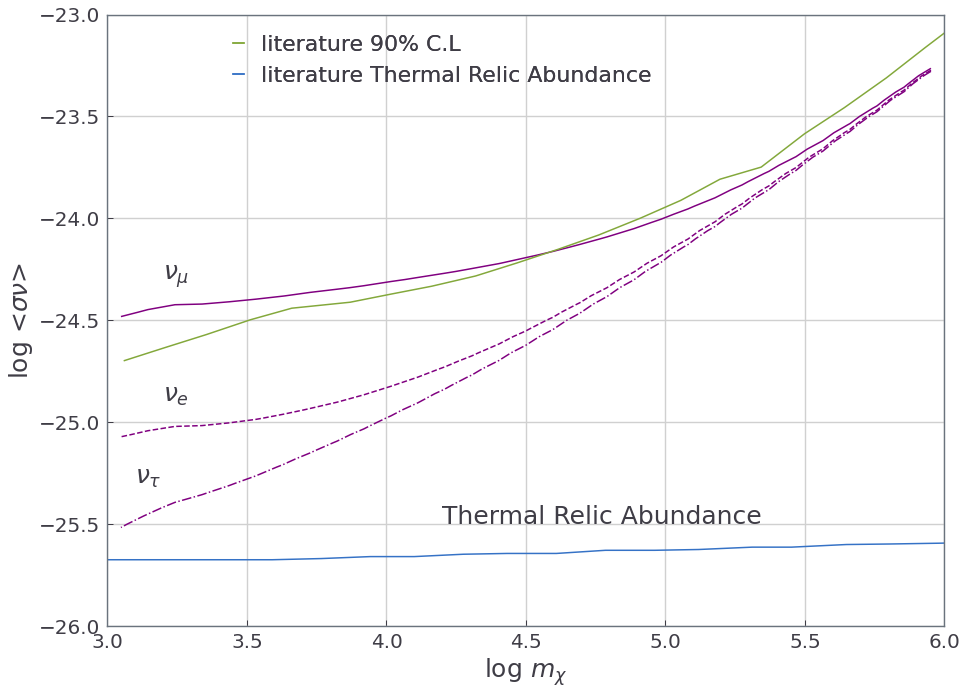

In [30]:
# All Limits-------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(1 - pdm.results["numu"], levels = [0.9], colors='purple', linestyles='-',
            origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(1 - pdm.results["nue"], levels = [0.9], colors='purple', linestyles='--',
            origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(1 - pdm.results["nutau"], levels = [0.9], colors='purple', linestyles='-.',
            origin='upper', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='literature Thermal Relic Abundance')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"log $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"log <$\sigma\nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)),-23.0)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r"$\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r"$\nu_\tau$", fontsize=fontsize)
ax1.text(4.2, -25.5, "Thermal Relic Abundance", fontsize=fontsize)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "All_Limits.png",
               bbox_inches='tight', dpi=export_dpi)